## <u> Dispersion Extraction Using FFT Method </u>

## Script information:
- This file is supposed to provide the best method of extracting the difference in spectral phase and then the GVD from OSA traces
- Provide data files from the OSA as csv's
- They will be converted to $\omega$, interpolated and the FFT procedure applied

In [1]:
# ********* Import modules ********* #
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
add_to_path_2 = os.path.join(parent_directory, "Modules/General-Python-Classes")
os.listdir(parent_directory)
print(add_to_path)

sys.path.append(add_to_path)
sys.path.append(add_to_path_2)
import RefractiveIndexClass
from DispersionExtractionClass import DispersionExtraction as de


c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\Modules/Refractive_Indices


-0.0142


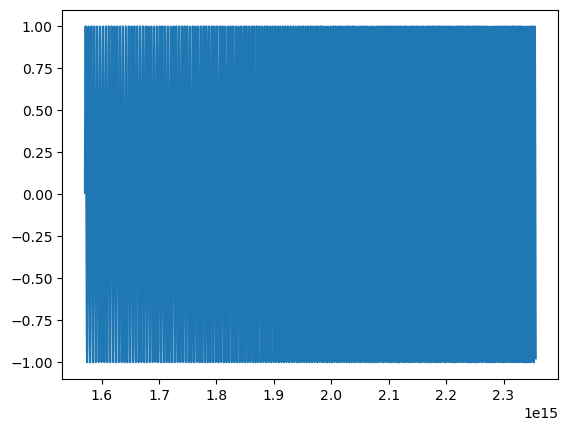

In [2]:
# Generate data:
import numpy as np
wavelengths = np.linspace(800, 1200, 10000)
omegas = 2 * np.pi * 3e17 / np.array(wavelengths)
omegas = np.linspace(max(omegas), min(omegas), len(wavelengths))
L_f = 0.01
DeltaL_air = - L_f * RefractiveIndexClass.RefractiveIndex.n_group(RefractiveIndexClass.RefractiveIndex.n_fs, 500) 
DeltaL_air = - 0.0142
print(DeltaL_air)
n_f = RefractiveIndexClass.RefractiveIndex.n_fs(wavelengths)
phase = (omegas / 3e8) * (DeltaL_air + L_f * n_f)
plt.plot(omegas, np.cos(phase))
cos_phi = np.cos(phase) + 1
omegas2 = omegas

##### Read OSA data (in wavelengths) from a CSV

In [3]:
import os
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
#directory_path = '/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/'

# Was uncommented
# directory_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData'

# # Get a list of CSV files in the directory
# csv_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.csv')])
# print(csv_files)
# total_files = len(csv_files)






# Loop through each CSV file
# for i, csv_file in enumerate(csv_files, start=1):
#     file_path = os.path.join(directory_path, csv_file)

#     # Read CSV file into a DataFrame
#     data = pd.read_csv(file_path, header = None)

#     # Plot the data
#     plt.plot(data[0], data[1])
    
#     # Set plot title
#     match = re.search(r'\d+of\d+', csv_file)
#     title_pattern = match.group() if match else f"NoPatternFound_{i}"

#     plt.title(f"{title_pattern}")

#     # Show the plot
#     plt.show()

#     # Pause for 1 second before the next iteration
#     # time.sleep(1)



OSA Spectrum Full: 


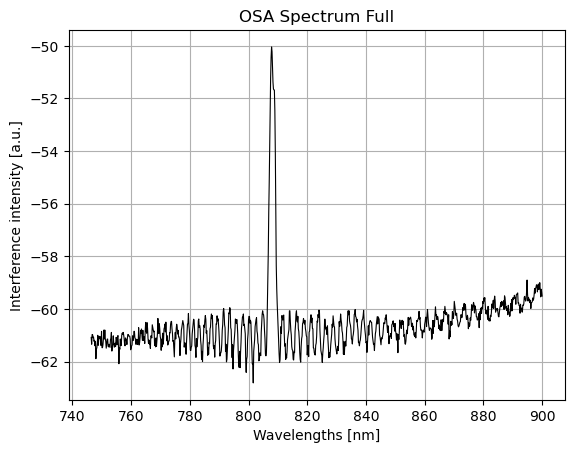

OSA Spectrum: 


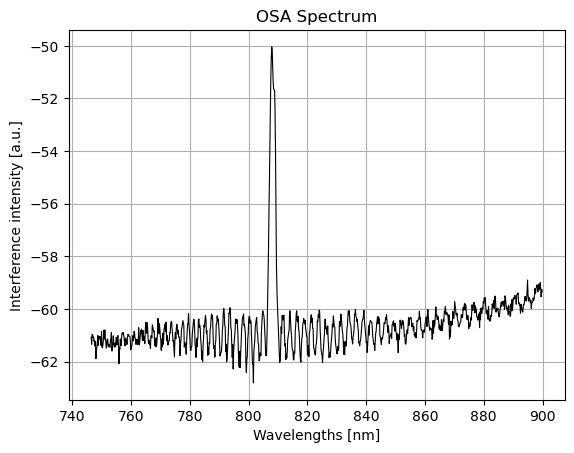

OSA Spectrum in Omega after Linear Interpolation: 


Text(0, 0.5, 'Interference intensity [a.u.]')

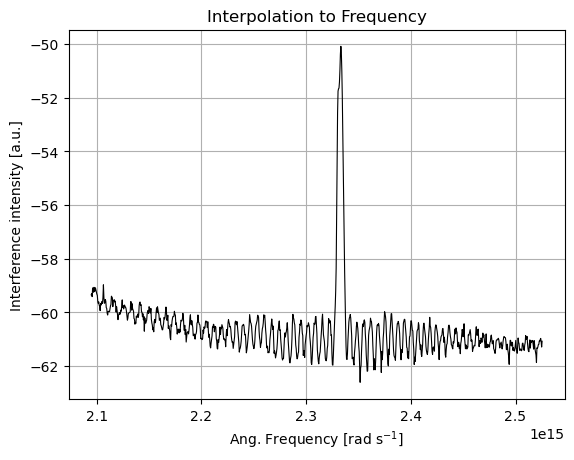

In [5]:
# Provide data:
data_set = "b6"
# interference_data_path =  "/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/HCF_120cm_16of40_61510um_Jack_21022024_1019.csv" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_fringes.csv"
interference_data_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData\HCF_120cm_16of40_61510um_Jack_21022024_1019.csv'
#interference_data_path = r'C:\Users\molly\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData\HCF_120cm_16of40_61510um_Jack_21022024_1019.csv'
reference_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_ref.csv"
fibre_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_signal.csv"
min_wavelength = 740
max_wavelength = 900
c = 3e17                                                        # SOL in nm / s
skiprows = 40
xlim = None

# Interference, reference and fibre read in:
data = pd.read_csv(interference_data_path, header=None, skiprows=skiprows)
fringes_x = data[0]
fringes_y = data[1]

if reference_data_path != "":
    data = pd.read_csv(reference_data_path, header=None, skiprows=skiprows)
    ref_x = data[0]
    ref_y = data[1]

if fibre_data_path != "":
    data = pd.read_csv(fibre_data_path, header=None, skiprows=skiprows)
    signal_x = data[0]
    signal_y = data[1]

# Restrict and divide by reference and fibre arms
idx = np.where((fringes_x > min_wavelength) & (fringes_x < max_wavelength))[0]
wavelengths = fringes_x[idx]
if (reference_data_path != "" and fibre_data_path != ""):
    show_all_traces = True 
    if show_all_traces:
        print("All OSA traces")
        plt.plot(fringes_x, fringes_y, color = 'r', linewidth = 0.8, label = "Fringes")
        plt.plot(signal_x, signal_y, color = 'g', linewidth = 0.8, label = "Signal")
        plt.plot(ref_x, ref_y, color = 'b', linewidth = 0.8, label = "Reference")
        plt.grid()
        plt.legend()
        plt.title("OSA All Traces")
        plt.xlabel("Wavelengths [nm]")
        plt.ylabel("Interference intensity [a.u.]")
        if xlim is not None:
            plt.xlim(xlim)
        plt.show()
    correlation_product_intensity = ((fringes_y - ref_y - signal_y) + np.sqrt(ref_y * signal_y)) /(2 * np.sqrt(ref_y * signal_y))
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, correlation_product_intensity, color = 'k', linewidth = 0.8, label = "Scaled")       
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.legend()
    if xlim is not None:
            plt.xlim(xlim)
    plt.show()
    intensity = correlation_product_intensity[idx]
else:
    intensity = fringes_y[idx]
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, fringes_y, color = 'k', linewidth = 0.8)
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.show()


print("OSA Spectrum: ")
plt.plot(wavelengths, intensity, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("OSA Spectrum")
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Interference intensity [a.u.]")
plt.show()

# Convert from wavelengths to frequency for ease of the FT, using linear interpolation:
def linear_interpolation_omega_wavelength(x, y):
    from scipy import interpolate
    x = 2 * np.pi * c / x                                           # Frequency in rad/s
    x_grid = np.linspace(min(x), max(x), len(y))                    # Adjust the number of points as needed        
    linear_interp = interpolate.interp1d(x, y, kind='linear')       # Perform linear interpolation
    y_interp = linear_interp(x_grid)
    return x_grid, y_interp

omegas, interference_intensity_omega = linear_interpolation_omega_wavelength(wavelengths, intensity)
x = omegas
y = interference_intensity_omega
print("OSA Spectrum in Omega after Linear Interpolation: ")
plt.plot(omegas, interference_intensity_omega, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("Interpolation to Frequency")
plt.xlabel(r"Ang. Frequency [rad s$^{-1}$]")
plt.ylabel("Interference intensity [a.u.]")

#### Scaling the interference using other traces if provided:

In [6]:
# NEEDS WORK, NEED TO INTERPOLATE OTHER DATA TOO
if not (reference_data_path == "" or fibre_data_path == ""):
    pass
    # Scale the interference by dividing by the others in the normal way

##### FFT the data:

960
960
960
960


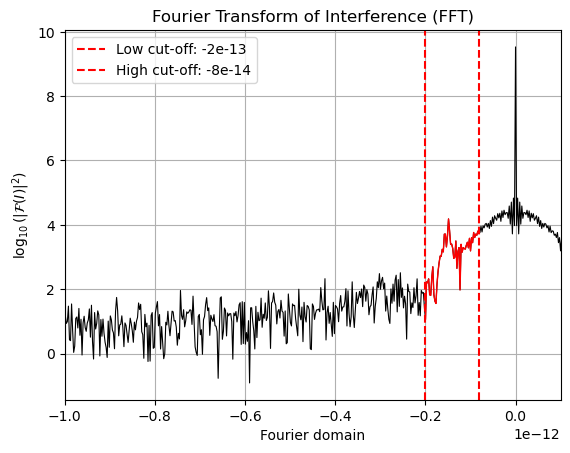

In [15]:
xscale = 1e-12
# keep_min_freq =  0.08 * xscale
# keep_max_freq = 2e-13 # 0.2 * xscale
keep_max_freq =  -0.08 * xscale
keep_min_freq = -2e-13 # 0.2 * xscale
# xlim = [-0.1 * xscale, 1 * xscale]
xlim = [-1 * xscale, 0.1 * xscale]
ylim = None

print(len(x))
print(len(y))
[xf, yf] = de.TraceFFT(x, y, normalise=False, hanning=False) # de.TraceFFT(x = x, y = y, normalise = False, hanning = False)
print(len(yf))
print(len(xf))
plt.plot(xf, np.log10(np.abs(yf)**2), color = 'k', linewidth = 0.8)
plt.axvline(keep_min_freq, color = 'red', linestyle = '--', label= f"Low cut-off: {keep_min_freq}")
if keep_max_freq is not None:
    plt.axvline(keep_max_freq, color = 'red', linestyle = '--', label= f"High cut-off: {keep_max_freq}")
idx = de.FilterIndicesFFT(xf, np.abs(yf), "right", keep_min_freq, keep_max_freq)
filtered_fourier_data = de.BoxFilter(yf, idx)
plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])**2), color='red', linewidth = 1)
plt.grid()
plt.legend()
plt.title("Fourier Transform of Interference (FFT)")
plt.xlabel("Fourier domain")
plt.ylabel(r'$\log_{10}(|\mathcal{F}(I)|^2)$')
# plt.ylim([5,6])
if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.show()

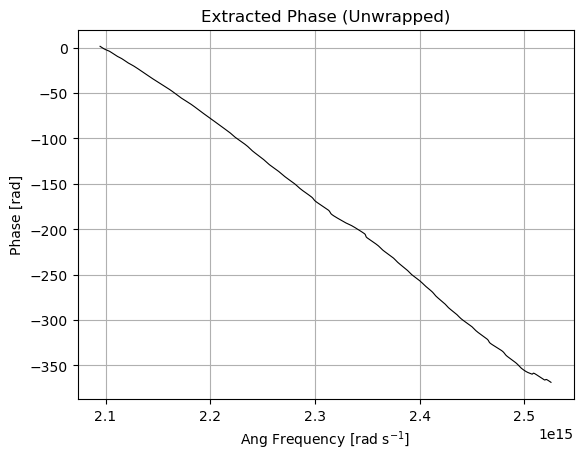

In [16]:
filtered_y = de.InverseFFT(filtered_fourier_data)
final_ys = de.ExtractAndUnwrap(filtered_y)
plt.plot(x, final_ys, color = 'k', linewidth = 0.8)
plt.title("Extracted Phase (Unwrapped)")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Ang Frequency [rad s$^{-1}$]")
plt.grid()
plt.show()

#### Convert back to wavelength from omega:

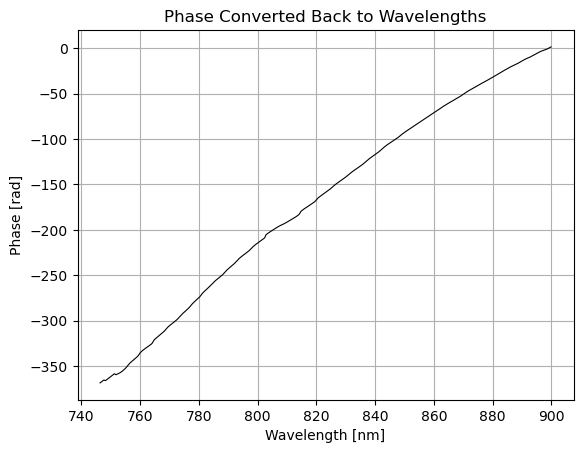

In [17]:
wavelengths, phase = linear_interpolation_omega_wavelength(x, final_ys)
plt.plot(wavelengths, phase, color = 'k', linewidth = 0.8)
plt.title("Phase Converted Back to Wavelengths")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Wavelength [nm]")
plt.grid()
plt.show()

#### Obtain $\beta$ from the phase

Text(0, 0.5, '$\\beta(\\lambda)$ [rad]')

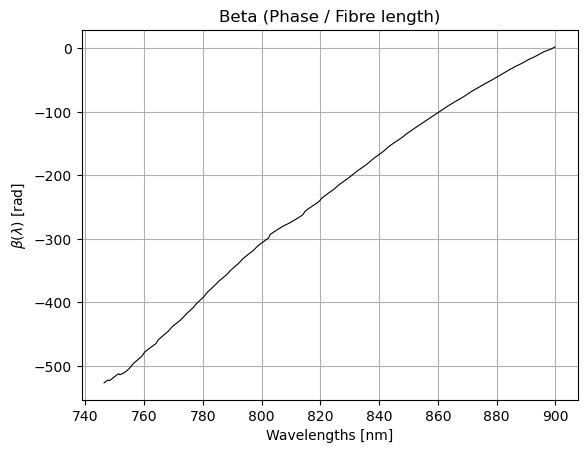

In [18]:
fibre_length = 0.7 
beta_lambda = de.ObtainBetaFromPhi(phase, fibre_length)
plt.plot(wavelengths, beta_lambda, color='k', linewidth = 0.8)
plt.grid()
plt.title("Beta (Phase / Fibre length)")
plt.xlabel("Wavelengths [nm]")
plt.ylabel(r'$\beta(\lambda)$ [rad]') # Note: Think this unit is wrong, should be rad per m
# plt.xlim([800, 825])
# plt.ylim([0, 150])

In [19]:
def CDA2(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf
    
    ! Step size must be the same as the grid step. !
    '''
    second_derivative = []
    last_point = len(func_vals) - 1
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[0] - 5 * func_vals[1] + 4 * func_vals[2] - func_vals[3]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[2] - 2 * func_vals[1] + func_vals[0])) # If the FDA ever fails use these.
    for i in range(1, last_point):
        second_derivative.append((1 / (step_size**2)) * (func_vals[i + 1] + func_vals[i - 1] - 2 * func_vals[i]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[last_point] - 2 * func_vals[last_point - 1] + func_vals[last_point - 2])) # If the BDA ever fails use these.
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[last_point] - 5 * func_vals[last_point - 1] + 4 * func_vals[last_point - 2] - func_vals[last_point - 3]))
    return second_derivative

def CDA1(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

    ! Step size must be the same as the grid step. !
    '''
    first_derivative = []
    last_point = len(func_vals) - 1
    first_derivative.append((1 / (2 * step_size)) * (-3 * func_vals[0] + 4 * func_vals[1] - func_vals[2] - func_vals[3]))
    for i in range(1, last_point):
        first_derivative.append((1 / (2 * step_size)) * (func_vals[i + 1] - func_vals[i - 1]))
    # first_derivative.append((1 / (step_size)) * (func_vals[last_point] - func_vals[last_point - 1]))
    first_derivative.append((1 / (2 * step_size)) * (3 * func_vals[last_point] - 4 * func_vals[last_point - 1] + func_vals[last_point - 2]))
    return first_derivative

def beta_lambda_func(refractive_index, wavelengths):
    beta = []
    for i in range(len(refractive_index)):
        beta.append(2 * np.pi * refractive_index[i] / wavelengths[i])
    return beta

def GVD_lambda_func(beta, wavelengths, output_ps_nm_km = True):
    '''
    GVD which is expressed as beta_2 * (-2 pi c / lambda**2). Sometimes denoted D.

    Parameters
    -------
    beta ([float]]): Array of beta values in nm^-1
    wavelengths ([float]): Array of wavelengths corresponding to the beta array in nm
    output_ps_nm_km (bool): Output can be given in expected units from input (s / nm*nm) [False] or in conventional (ps / nm*km) [True - Default].

    Returns
    -------
    GVD as an array.
    '''
    c0 = 3e17                                                           # Speed of light in vacuum in nm / s
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    second_derivative = CDA2(beta, wavelengths[1] - wavelengths[0])
    GVD = []
    for i in range(len(beta)):
        GVD.append(-1 * ((2 * np.pi * c0) / (wavelengths[i]**2)) * ( ( (wavelengths[i]**3) / (2 * np.pi**2 * c0**2) ) * first_derivative[i] + ( (wavelengths[i]**4) / ((2 * np.pi * c0)**2) ) * second_derivative[i] ) )
    if output_ps_nm_km:
        GVD = np.array(GVD) * 1e24                                      # Converts from s / nm*nm to ps / nm*km (conventional).
    return GVD

In [20]:
print(len(wavelengths))
wavelengths_for_lens_calc = wavelengths

960


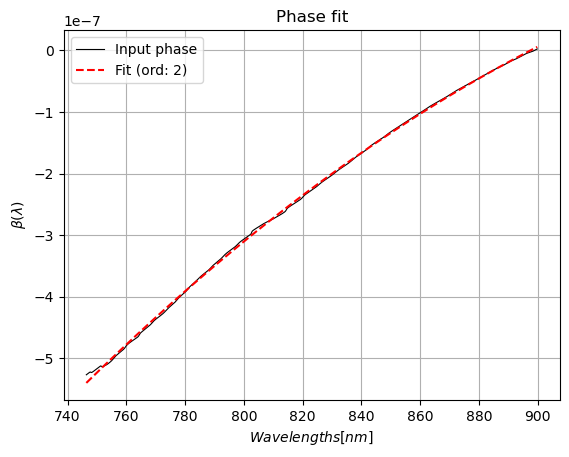

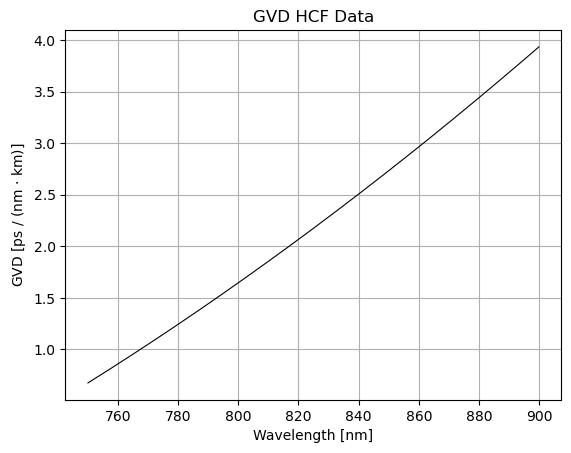

0.0


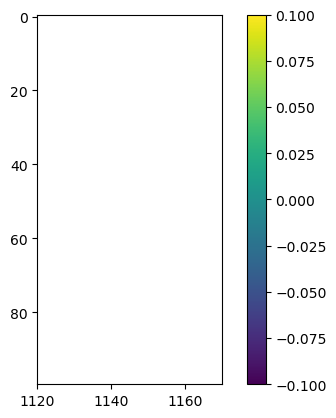

Normalised gap value not a float, defaulting to bessel zero.
j1nz is
2.404825557695773


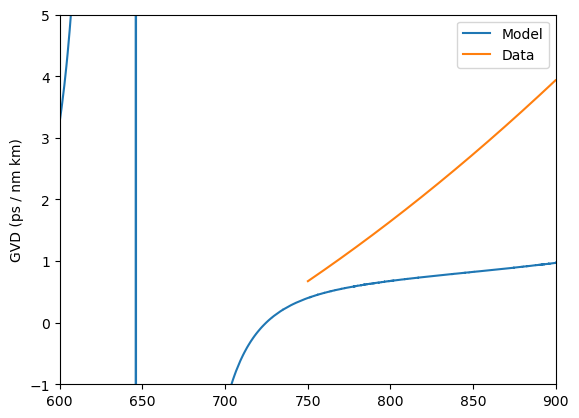

In [21]:
GVD_lambda = de.GVD_lambda(beta_lambda*1e-9, wavelengths, method = "Fit", order = 2, show_plots = True) # note have converted beta to units of nm^-1 rather than m^-1
idx = np.where(wavelengths > 750)[0]
wavelengths = wavelengths[idx]
GVD_lambda = GVD_lambda[idx]
# plt.plot(wavelengths, GVD_lambda * 1000, color = 'k', linewidth = 0.8, label = "Data")
plt.plot(wavelengths, GVD_lambda, color = 'k', linewidth = 0.8, label = "Data")
plt.grid()
# print(GVD_lambda)
plt.title("GVD HCF Data")
plt.ylabel(r"GVD [ps / (nm $\cdot$ km)]")
plt.xlabel("Wavelength [nm]")
plt.show()
plt.xlim([1120, 1170])



ws = np.linspace(0.1e-6, 0.9e-5, 100)
Rs = np.linspace(20e-6, 30e-6, 100)
global_error = np.zeros((len(ws), len(Rs)))
print(global_error[0, 99])
i = 0
j = 0
best_R = 100000
best_w = 100000
min_error = 10000
# for w in ws:
#     for R in Rs:        
#         print(f"i j = {i}, {j}")
#         refractive_index_HCF = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R, w=w,part="R")
#         beta_HCF = beta_lambda_func(refractive_index_HCF, wavelengths)
#         GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
#         current_error = np.sqrt(np.mean((np.array(GVD_HCF) - np.array(GVD_lambda)) ** 2))
#         global_error[i, j] = current_error
#         if current_error < min_error:
#             min_error = current_error
#             best_w = w
#             best_R = R
#         j += 1
#     j = 0
#     i += 1
        
        
plt.imshow(global_error)
plt.colorbar()
# plt.xlim([95, 100])
# plt.ylim([95, 100])
plt.show()
# HCF Model
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
X = [6.1e-07, 2.4000000e-05]


R_op = X[1]
w_op = X[0]
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R_op,w=w_op,part="R")
beta_HCF = beta_lambda_func(index, simulation_wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
# plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.plot(wavelengths, GVD_lambda, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([600,900])
# plt.ylim([-10e-9, 10e-9])
plt.ylim(-1, 5.0)
plt.show()

E
j value
2.233981484203099
j1nz is
2.404825557695773
[2.08184717e+07 8.33963912e-01 8.34499567e-01 8.35064559e-01
 8.35572714e-01 8.36099857e-01 8.36640861e-01 8.37231172e-01
 8.37703335e-01 8.38295688e-01 8.38840758e-01 8.39373975e-01
 8.39930856e-01 8.40424945e-01 8.41054516e-01 8.41570361e-01
 8.42089376e-01 8.42687965e-01 8.43198074e-01 8.43777595e-01
 8.44299131e-01 8.44879967e-01 8.45392582e-01 8.45954343e-01
 8.46560252e-01 8.47082629e-01 8.47639000e-01 8.48142488e-01
 8.48792658e-01 8.49338924e-01 8.49817038e-01 8.50467817e-01
 8.50999401e-01 8.51529640e-01 8.52135589e-01 8.52648080e-01
 8.53226259e-01 8.53824096e-01 8.54354373e-01 8.54976501e-01
 8.55479851e-01 8.56106240e-01 8.56686114e-01 8.57214402e-01
 8.57768468e-01 8.58343357e-01 8.58934108e-01 8.59535770e-01
 8.60060790e-01 8.60669308e-01 8.61273838e-01 8.61786715e-01
 8.62368279e-01 8.62972299e-01 8.63511058e-01 8.64186570e-01
 8.64662663e-01 8.65348562e-01 8.65825003e-01 8.66460064e-01
 8.67041570e-01 8.67606028e-01 

C:\Users\met50\AppData\Local\Temp\ipykernel_2236\868629288.py:27: OptimizeWarning: Unknown solver options: pgtol
  result = minimize(min2, [w, R], bounds=[(0.45e-6, 0.5e-6), (22e-6, 25e-6)],  options={'pgtol': 1e-25}, tol=1e-25)


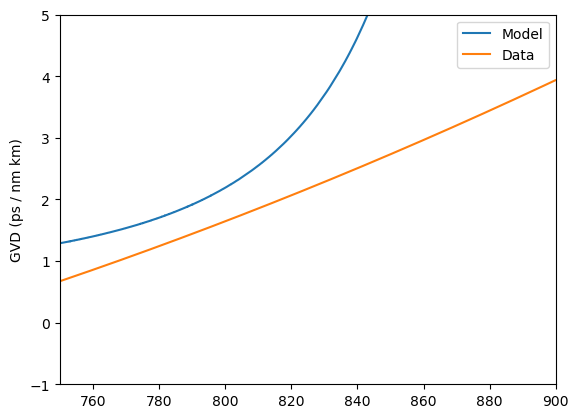

In [22]:
from functools import partial
from scipy.optimize import minimize
#HCF_new = partial(RefractiveIndexClass.RefractiveIndex.HCF, wavelengths = wavelengths, mode = [1, 1], n_gas = None, n_wall = None, R = 24e-6, part = "Real", parameter = "wavelength", normalised_gap = True, r_cap = None, M = 6)

def HCF(wavelengths, w, R):
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths = wavelengths, w=w, R=R, normalised_gap=True)
    beta_HCF = beta_lambda_func(index, wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
    return GVD_HCF

HCF_new = partial(HCF, wavelengths)
print("E")
# print(HCF_new(w=0.7e-6))
def func_to_min_GVD(HCF_new_1, lab_data, X):
    w = X[0]
    R = X[1]
    return np.sqrt(np.mean((HCF_new_1(w, R) - lab_data)**2))

w = 0.9e-6
R=24e-6
c =[5.0e-07, 2.2e-05]
print(HCF(wavelengths, 5e-7, 2.2e-5))

# min2 = partial(func_to_min_GVD, HCF_new, GVD_lambda*1000)
min2 = partial(func_to_min_GVD, HCF_new, GVD_lambda)
min2([0.7e-6,R])
result = minimize(min2, [w, R], bounds=[(0.45e-6, 0.5e-6), (22e-6, 25e-6)],  options={'pgtol': 1e-25}, tol=1e-25)
print(result)

R_op = result.x[1]
w_op = result.x[0]
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R_op,w=w_op,part="R")
beta_HCF = beta_lambda_func(index, simulation_wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
# plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.plot(wavelengths, GVD_lambda, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([750,900])
# plt.ylim([-10e-9, 10e-9])
plt.ylim(-1, 5.0)
plt.show()
c =[5.0e-07, 2.2e-05]

4.5e-07
j value
2.233592635068359
j1nz is
2.404825557695773


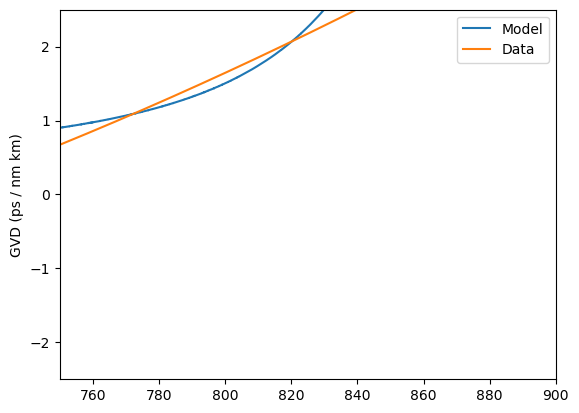

4.5714285714285715e-07
j value
2.2336218479462584
j1nz is
2.404825557695773


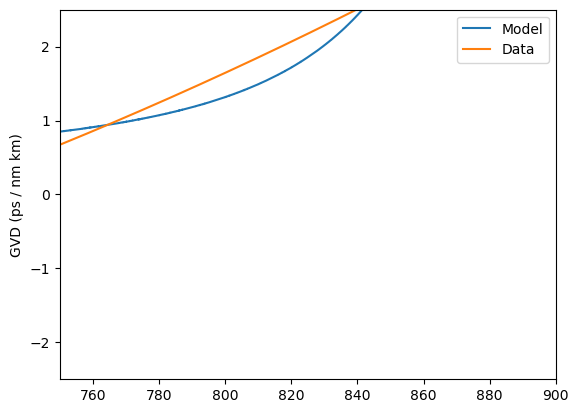

4.6428571428571427e-07
j value
2.2336510421688693
j1nz is
2.404825557695773


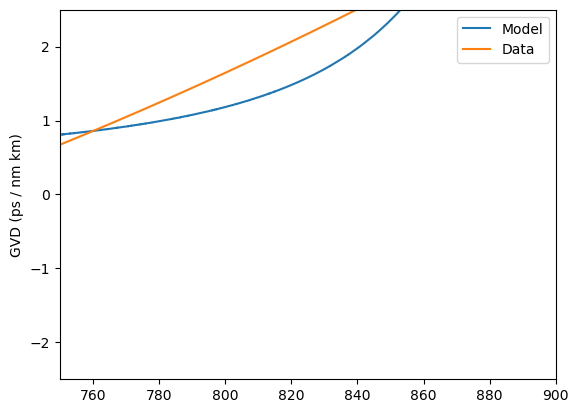

4.714285714285714e-07
j value
2.2336802177361923
j1nz is
2.404825557695773


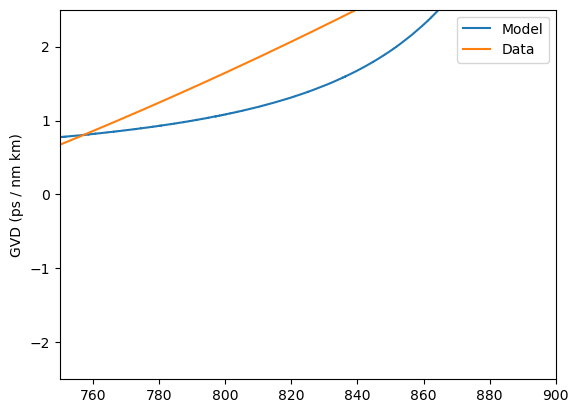

4.785714285714286e-07
j value
2.2337093746482273
j1nz is
2.404825557695773


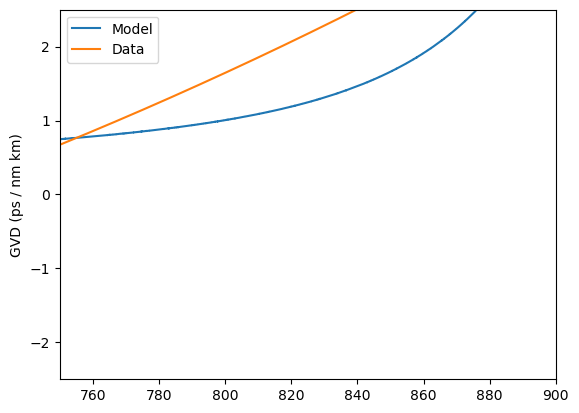

4.857142857142857e-07
j value
2.2337385129049743
j1nz is
2.404825557695773


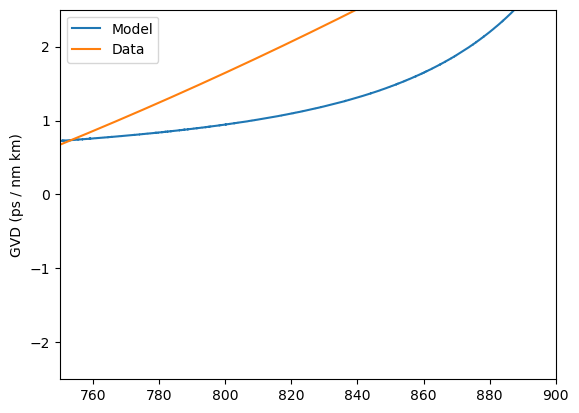

4.928571428571429e-07
j value
2.2337676325064333
j1nz is
2.404825557695773


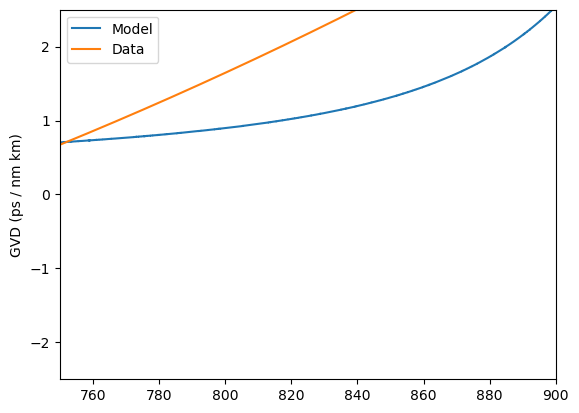

5e-07
j value
2.233796733452604
j1nz is
2.404825557695773


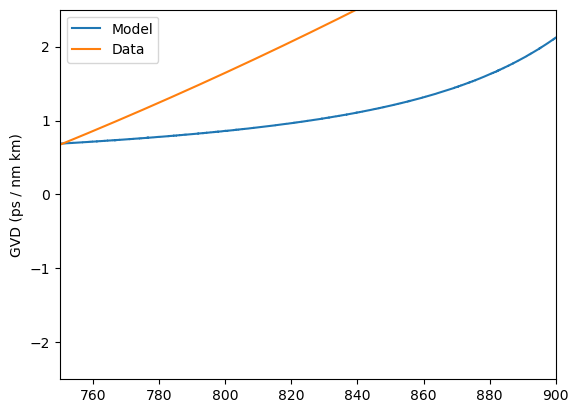

5.071428571428571e-07
j value
2.233825815743487
j1nz is
2.404825557695773


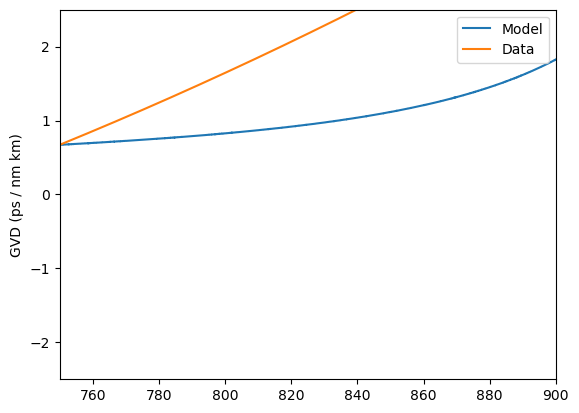

5.142857142857143e-07
j value
2.2338548793790816
j1nz is
2.404825557695773


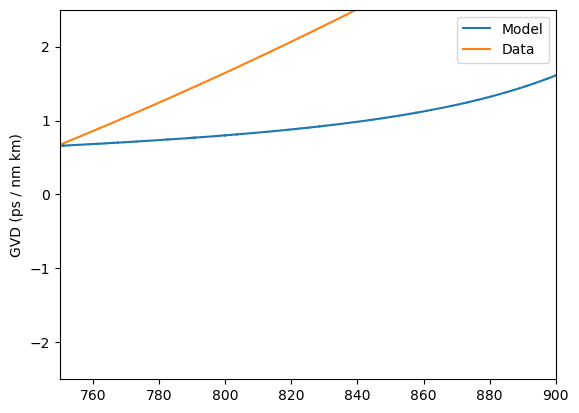

5.214285714285714e-07
j value
2.233883924359388
j1nz is
2.404825557695773


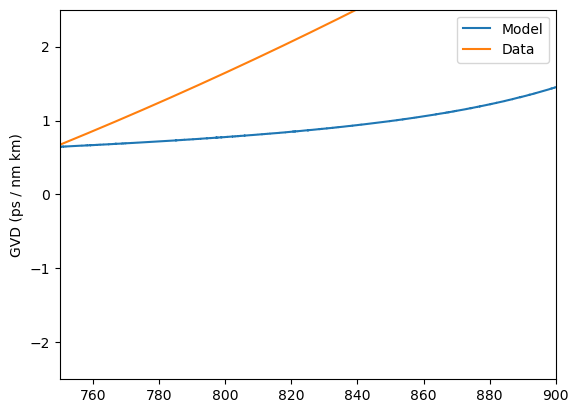

5.285714285714286e-07
j value
2.233912950684407
j1nz is
2.404825557695773


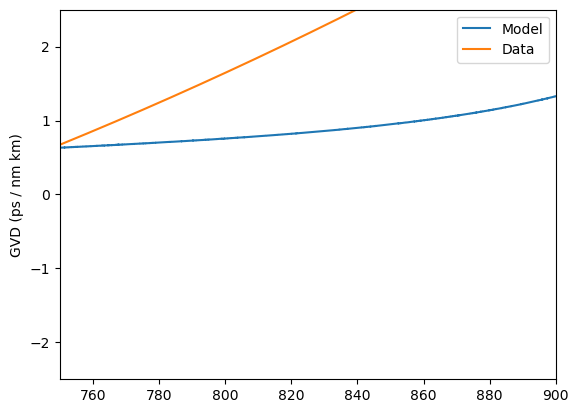

5.357142857142858e-07
j value
2.233941958354137
j1nz is
2.404825557695773


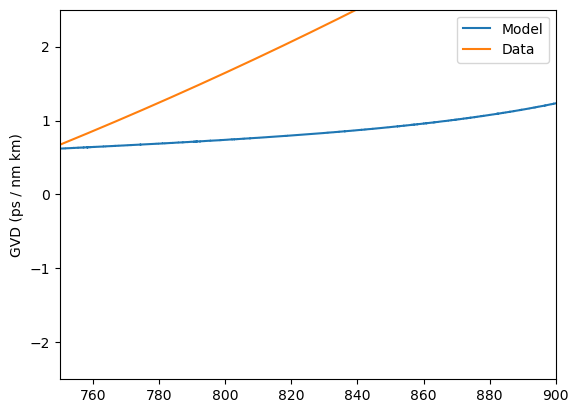

5.428571428571429e-07
j value
2.23397094736858
j1nz is
2.404825557695773


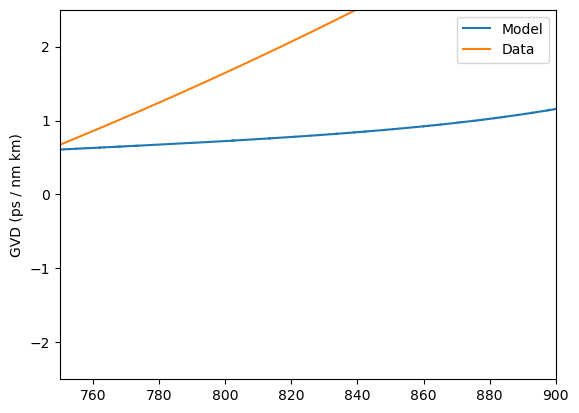

5.5e-07
j value
2.233999917727734
j1nz is
2.404825557695773


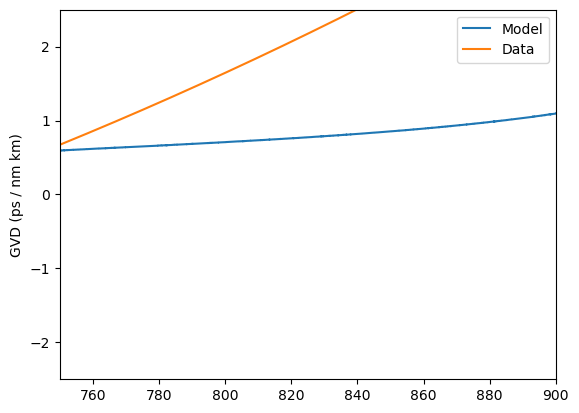

In [23]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
ws = np.linspace(0.45e-6, 0.55e-6, 15)
for w in ws:
    print(w)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=24e-6,w=w,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, w, 24e-6, 0.7*24e-6))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    # plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.plot(wavelengths, GVD_lambda, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()

[750.08 750.24 750.4  750.56 750.72 750.88 751.04 751.2  751.36 751.52
 751.68 751.84 752.   752.16 752.32 752.48 752.64 752.8  752.96 753.12
 753.28 753.44 753.6  753.76 753.92 754.08 754.24 754.4  754.56 754.72
 754.88 755.04 755.2  755.36 755.52 755.68 755.84 756.   756.16 756.32
 756.48 756.64 756.8  756.96 757.12 757.28 757.44 757.6  757.76 757.92
 758.08 758.24 758.4  758.56 758.72 758.88 759.04 759.2  759.36 759.52
 759.68 759.84 760.   760.16 760.32 760.48 760.64 760.8  760.96 761.12
 761.28 761.44 761.6  761.76 761.92 762.08 762.24 762.4  762.56 762.72
 762.88 763.04 763.2  763.36 763.52 763.68 763.84 764.   764.16 764.32
 764.48 764.64 764.8  764.96 765.12 765.28 765.44 765.6  765.76 765.92
 766.08 766.24 766.4  766.56 766.72 766.88 767.04 767.2  767.36 767.52
 767.68 767.84 768.   768.16 768.32 768.48 768.64 768.8  768.96 769.12
 769.28 769.44 769.6  769.76 769.92 770.08 770.24 770.4  770.56 770.72
 770.88 771.04 771.2  771.36 771.52 771.68 771.84 772.   772.16 772.32
 772.4

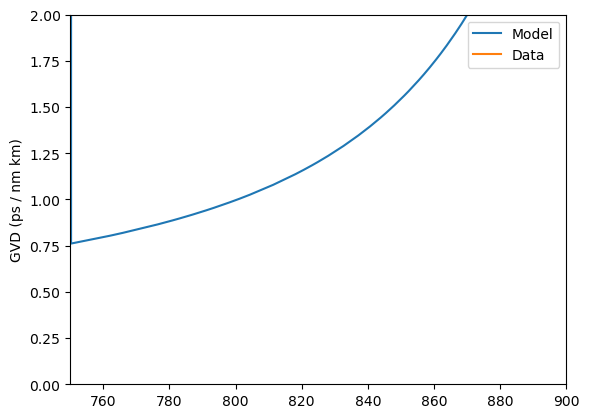

R_op = 2.35e-05, w_op = 4.857142857142857e-07


In [25]:


# Double

simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)

# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
smallest_difference = -1
Rs = np.linspace(23.5e-6, 24.5e-6, 15)
ws = np.linspace(0.4e-6, 0.7e-6,15)
print(wavelengths)
w_op = 0
R_op = 0
for w in ws:
    for R in Rs:
        # print(R)
        index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R,w=w,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
        beta_HCF = beta_lambda_func(index, wavelengths)
        GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
        idx = np.where(wavelengths > 775)[0]
        wavelengths2 = wavelengths[idx]
        GVD_lambda2 = GVD_lambda[idx]
        GVD_HCF = GVD_HCF[idx]
        # difference =  np.sqrt(np.mean((GVD_HCF - GVD_lambda2*1000)**2))
        difference =  np.sqrt(np.mean((GVD_HCF - GVD_lambda2)**2))
        # plt.plot(wavelengths2, GVD_HCF,label="model")
        # plt.plot(wavelengths2, GVD_lambda2*1000, label="Data")
        # # plt.xlim(760, 900)
        # plt.ylim([0,5])
        # plt.legend()
        # plt.show()
        # import time
        # time.sleep(1)
        
        # plt.close()
        if smallest_difference == -1:
            smallest_difference = difference
            w_op = w
            R_op = R
            print(f"First iteration: Setting difference to {smallest_difference}")            
        elif difference < smallest_difference:
            smallest_difference = difference
            w_op = w
            R_op = R
            print(f"Difference updated: New value is {smallest_difference}")
        

index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R_op,w=w_op,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
beta_HCF = beta_lambda_func(index, wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
plt.plot(wavelengths, np.array(GVD_HCF), label = "Model")
plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([750,900])
#plt.ylim([-10e-9, 10e-9])
plt.ylim(0, 2)
plt.show()
print(f"R_op = {R_op}, w_op = {w_op}")

# Saving data..
#from DataAnalysisClass import DataHandling as DH
#DH.write_csv("./Report-Data/HCF_dispersion_measurement_fit_01.csv", [wavelengths, GVD_HCF, GVD_lambda*1000], ["wavelengths_nm", "GVD_model_ps_nm_km", "GVD_data_ps_nm_km"])

2.3e-05
j value
2.2357536013413513
j1nz is
2.404825557695773


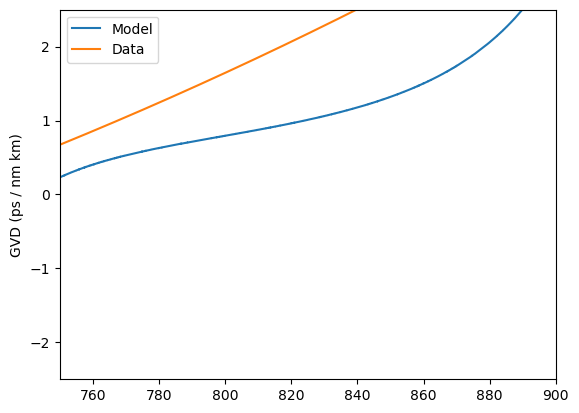

2.3142857142857142e-05
j value
2.235729771467938
j1nz is
2.404825557695773


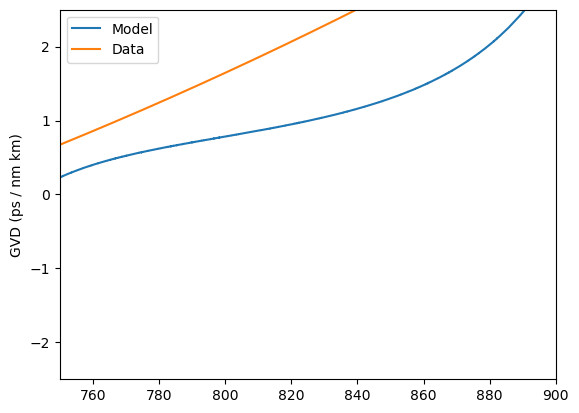

2.3285714285714287e-05
j value
2.2357062205453486
j1nz is
2.404825557695773


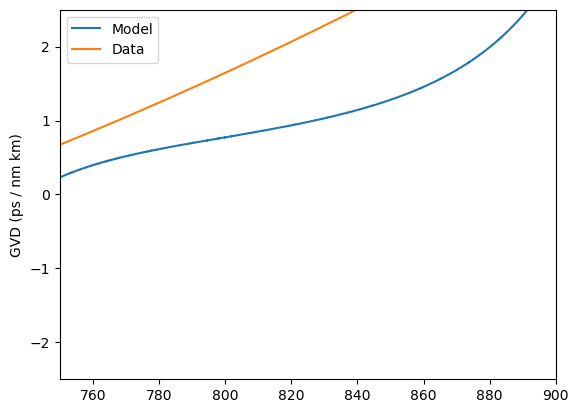

2.342857142857143e-05
j value
2.2356829437151835
j1nz is
2.404825557695773


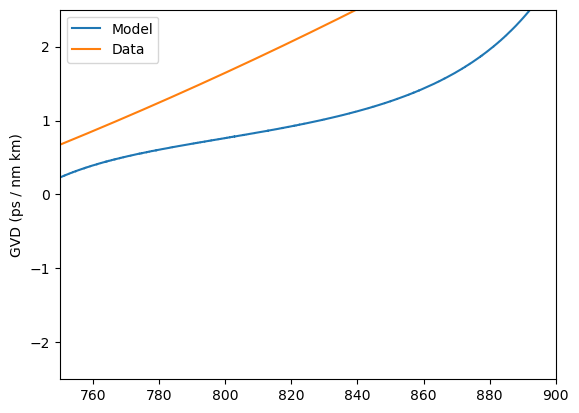

2.357142857142857e-05
j value
2.2356599362309337
j1nz is
2.404825557695773


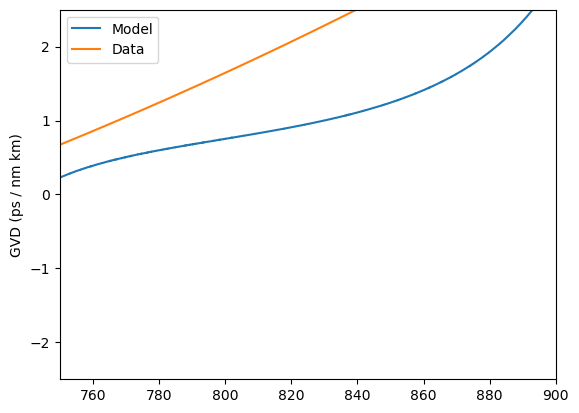

2.3714285714285713e-05
j value
2.235637193454789
j1nz is
2.404825557695773


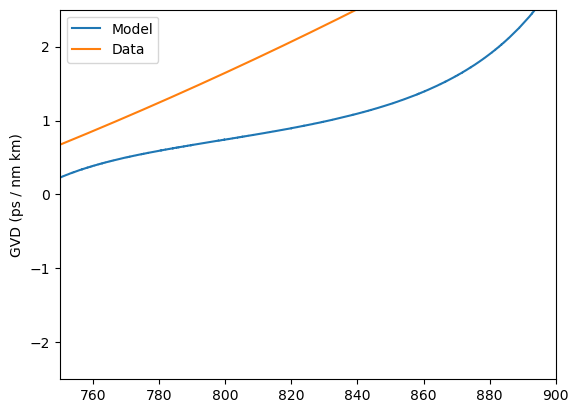

2.385714285714286e-05
j value
2.2356147108545508
j1nz is
2.404825557695773


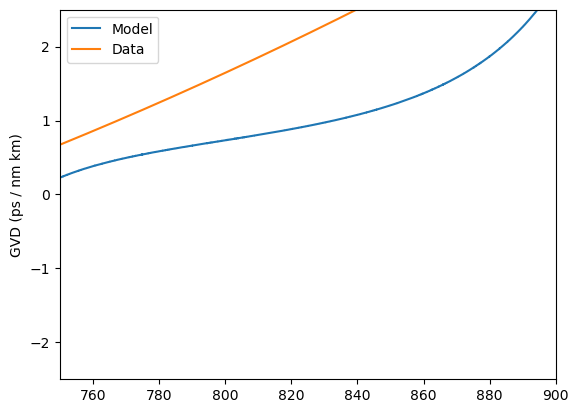

2.4e-05
j value
2.2355924840006507
j1nz is
2.404825557695773


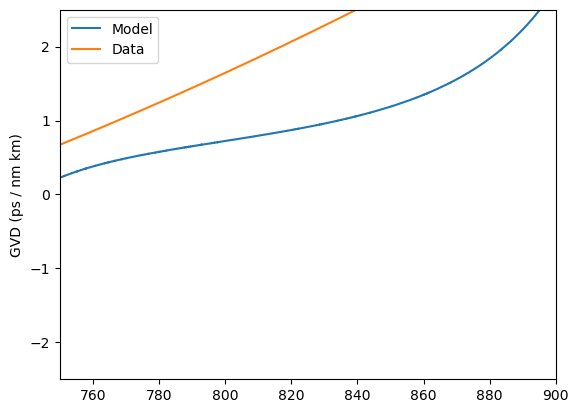

2.4142857142857143e-05
j value
2.2355705085632707
j1nz is
2.404825557695773


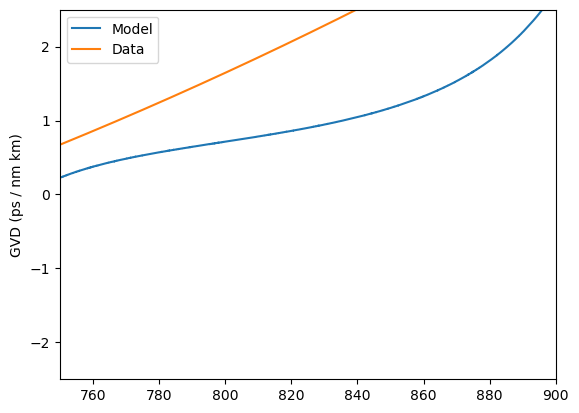

2.4285714285714288e-05
j value
2.235548780309556
j1nz is
2.404825557695773


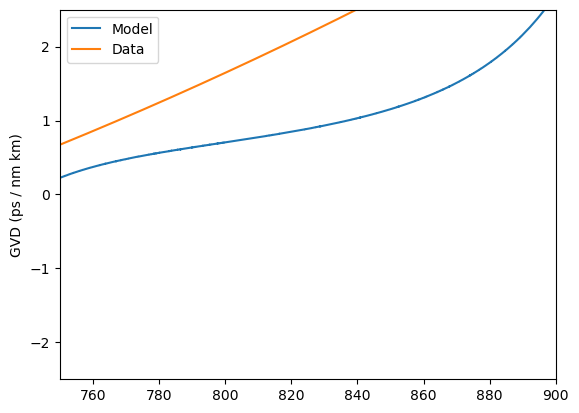

2.442857142857143e-05
j value
2.2355272951009257
j1nz is
2.404825557695773


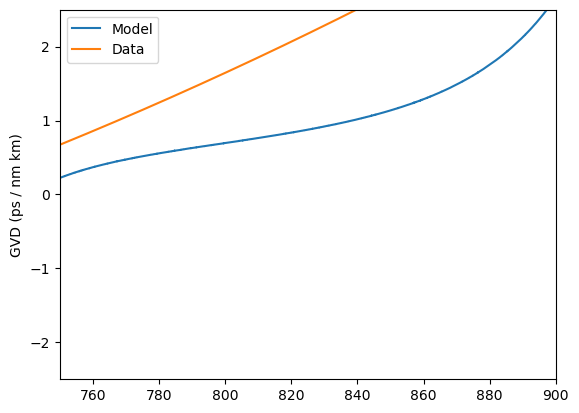

2.4571428571428572e-05
j value
2.235506048890467
j1nz is
2.404825557695773


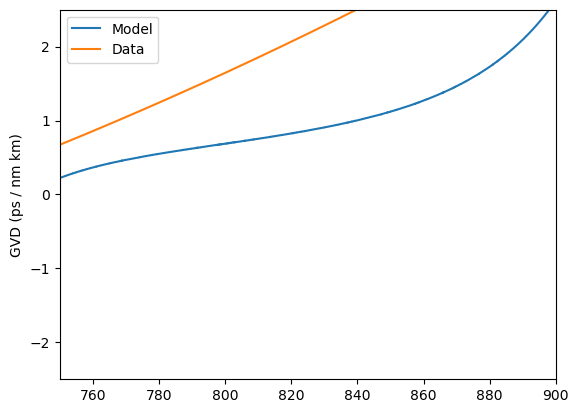

2.4714285714285714e-05
j value
2.235485037720417
j1nz is
2.404825557695773


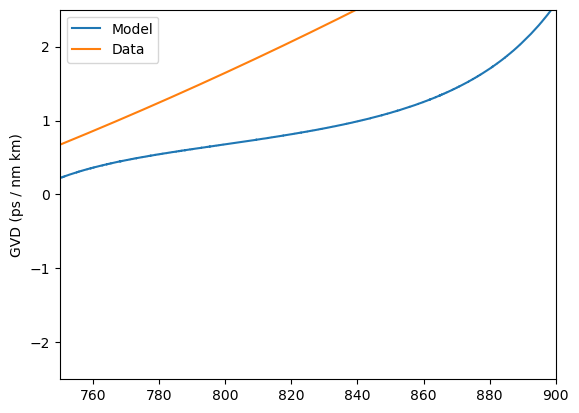

2.485714285714286e-05
j value
2.235464257719731
j1nz is
2.404825557695773


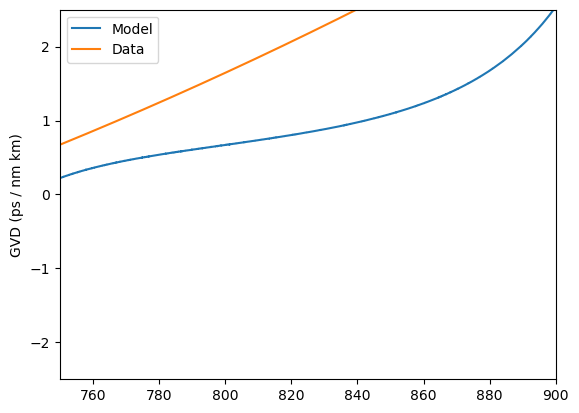

2.5e-05
j value
2.2354437051017197
j1nz is
2.404825557695773


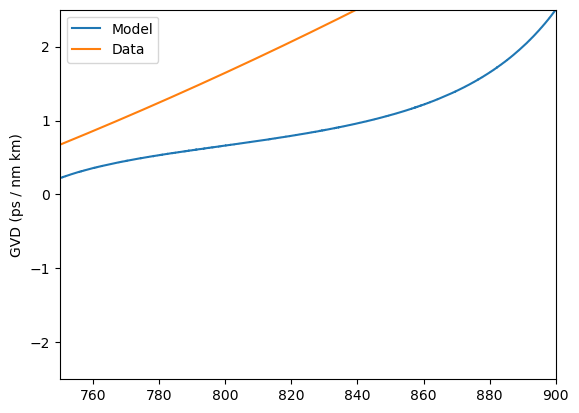

In [26]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
Rs = np.linspace(23e-6, 25e-6, 15)
for R in Rs:
    print(R)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R,w=9.5e-07,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    # plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.plot(wavelengths, GVD_lambda, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()

# Accounting for dispersion of the lenses

### Lens data from matlab file

In [43]:
lambda_lens = [591.5,597.4,605.2,614.4,622.8,630.8,639,648.4,658.2,671,683.4,694.6,707.2,720.2,733.6,749.9,767,785.4,806,826.8,850,872.5,901.8,941.2,974.8,1019.2,1115,1222.5,1650]
pos_lens = [23.8,23.79,23.78,23.77,23.76,23.75,23.74,23.73,23.72,23.71,23.70,23.69,23.68,23.67,23.66,23.65,23.64,23.63,23.62,23.61,23.60,23.59,23.58,23.57,23.56,23.55,23.53,23.52,23.51]

In [44]:
min_pos_lens = min(pos_lens)
pos_lens_zero = [pos - min_pos_lens for pos in pos_lens]
print(pos_lens_zero)

[0.28999999999999915, 0.2799999999999976, 0.2699999999999996, 0.259999999999998, 0.25, 0.23999999999999844, 0.22999999999999687, 0.21999999999999886, 0.2099999999999973, 0.1999999999999993, 0.18999999999999773, 0.17999999999999972, 0.16999999999999815, 0.16000000000000014, 0.14999999999999858, 0.13999999999999702, 0.129999999999999, 0.11999999999999744, 0.10999999999999943, 0.09999999999999787, 0.08999999999999986, 0.0799999999999983, 0.06999999999999673, 0.05999999999999872, 0.04999999999999716, 0.03999999999999915, 0.019999999999999574, 0.00999999999999801, 0.0]


### Find the group delay data for our fiber

Group delay = $\frac{L_{f}}{v_{g}}$

In [55]:
fibre_length

0.7

960
10000
960
960


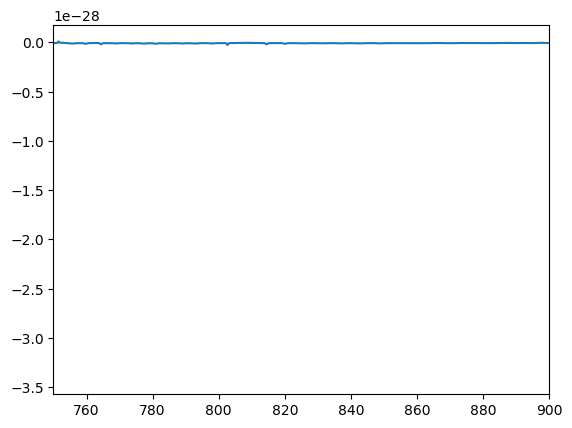

In [56]:
print(len(beta_lambda))

v_g = de.Vg_lambda(beta_lambda*1e-9, wavelengths_for_lens_calc) # v_g will have units nm s^-1 since beta input in nm^-1
c_0 = 3e17 # speed of light in nm s^-1
group_delay = []
for i in range(len(v_g)):
    group_delay.append(fibre_length*1e-9 / v_g[i]) # group delay units will therefore be nm / (nm s^-1) = s

print(len(simulation_wavelengths))
print(len(v_g))
print(len(group_delay))

plt.plot(wavelengths_for_lens_calc, group_delay)
plt.xlim(750, 900)
# plt.ylim(0, 0.01)
plt.show()

In [57]:
### fiber group delay data ###
# pos_up = [18.67,18.13,17.51,16.98,16.535,16.31,16.2,16.11,15.98,16.11,16.26,16.295]
pos_up = group_delay

### wavelengths at which the delay data is recorded ###
# lambda_up = [653.2,685.2,732,784.4,846.8,892.6,922.55,950,1149.75,1234,1300.25,1311.95]
lambda_up = list(wavelengths_for_lens_calc) # needs to be in ascending order

In [58]:
pos_dn = []
lambda_dn = []

In [59]:
### all data ###
### flipping the order of the arrays ###
# pos_data = [fliplr(pos_dn) pos_up];
pos_data = pos_dn[::-1] + pos_up
print(pos_data)

# lambda_data = [fliplr(lambda_dn) lambda_up];
lambda_data = lambda_dn[::-1] + lambda_up
print(lambda_data)

[-3.4021572940568915e-28, -7.85005211557225e-31, -7.816997951994628e-31, -7.742186328626024e-31, -7.601469754614728e-31, -7.3105591445762755e-31, -6.733148677814467e-31, -5.488421954603537e-31, -2.4375131211487723e-31, 3.0868448608296314e-31, 4.5260112879959146e-31, -3.5565818389607274e-32, -4.587552252616535e-31, -6.360883684744326e-31, -7.133088130213695e-31, -7.524763971993561e-31, -7.733615810154709e-31, -7.842903598749357e-31, -7.907084998909149e-31, -7.941205207155867e-31, -7.951929510128792e-31, -7.94251089752869e-31, -7.915423485216819e-31, -7.870179884411079e-31, -7.803139267727614e-31, -7.697068768285499e-31, -7.538853429287777e-31, -7.305038951714277e-31, -6.918543499205701e-31, -6.186209236564452e-31, -4.100308687092964e-31, 2.0947082249045954e-31, 8.50756042461022e-31, 5.564033542952813e-31, -1.4307572447375577e-31, -4.194658398693124e-31, -4.771561964754775e-31, -4.743316507481434e-31, -4.606456929065176e-31, -4.569877191816097e-31, -4.726491511743317e-31, -5.108977993909

In [60]:
### correct fibre data to remove effect of lenses ###
# pos_data_corrected = pos_data - spline(lambda_lens,pos_lens_zero,lambda_data);

from scipy.interpolate import interp1d

# Perform spline interpolation
interp_func = interp1d(lambda_lens, pos_lens_zero, kind='linear')
interp_values = interp_func(lambda_data) # compute interpolated values
print(interp_values)

pos_data_corrected = pos_data - interp_values # subtract element wise to correct for the effect of the lens
print(pos_data_corrected)

[0.14214724 0.14204908 0.14195092 0.14185276 0.1417546  0.14165644
 0.14155828 0.14146012 0.14136196 0.1412638  0.14116564 0.14106748
 0.14096933 0.14087117 0.14077301 0.14067485 0.14057669 0.14047853
 0.14038037 0.14028221 0.14018405 0.14008589 0.1399883  0.13989474
 0.13980117 0.1397076  0.13961404 0.13952047 0.1394269  0.13933333
 0.13923977 0.1391462  0.13905263 0.13895906 0.1388655  0.13877193
 0.13867836 0.1385848  0.13849123 0.13839766 0.13830409 0.13821053
 0.13811696 0.13802339 0.13792982 0.13783626 0.13774269 0.13764912
 0.13755556 0.13746199 0.13736842 0.13727485 0.13718129 0.13708772
 0.13699415 0.13690058 0.13680702 0.13671345 0.13661988 0.13652632
 0.13643275 0.13633918 0.13624561 0.13615205 0.13605848 0.13596491
 0.13587135 0.13577778 0.13568421 0.13559064 0.13549708 0.13540351
 0.13530994 0.13521637 0.13512281 0.13502924 0.13493567 0.13484211
 0.13474854 0.13465497 0.1345614  0.13446784 0.13437427 0.1342807
 0.13418713 0.13409357 0.134      0.13390643 0.13381287 0.13371

### Problem interpreting units in cell below

In [61]:
### find min and mix of lambda_data ###
min_lambda_data = min(lambda_data)
max_lambda_data = max(lambda_data)

#### creates an array that starts at min_lmabda_data, increasing by 1 each time until it reaches max_lambda_data ###
lambda1 = np.arange(min_lambda_data, max_lambda_data + 1) # need the +1 as it's exclusive

### perform a fit on the corrected data ###
pfit_order = 2 # fit currently has order 2

pos1fit, residuals, rank, singular_values, rcond = np.polyfit(lambda_data, pos_data_corrected, pfit_order, full=True)

print("Coefficients of fitted polynomial:", pos1fit)

### Evaluate the polynomial at lambda1 ###
c_0 = 3e17 # lambda is in nm so c should be in nm per second
######### Note; not sure what the unit of the 2e-3 is; assuming metres #################
gd1 = 2e-3 * np.polyval(pos1fit, lambda1) / c_0 # absolute group delay introduced by mirror position (s); factor of 2 comes in be of the mirrors

### Scale gd1 and set minimum value to zero ###
gd1mp = 1e12 * (gd1 - np.min(gd1)) / fibre_length

# Derivative of gd1 with respect to lambda1
diff_gd1 = np.diff(gd1)
diff_lambda1 = np.diff(lambda1)
gvd1 = (1e12 / (fibre_length * 1e-3)) * (diff_gd1 / diff_lambda1) # Note: 1e12 is probably the conversion to ps.       D [ps / (nm km)]


Coefficients of fitted polynomial: [-7.41676582e-07  1.68632375e-03 -9.87262915e-01]


In [62]:
gvd1

array([5.50864067e-09, 5.49451350e-09, 5.48038632e-09, 5.46625915e-09,
       5.45213198e-09, 5.43800481e-09, 5.42387763e-09, 5.40975046e-09,
       5.39562329e-09, 5.38149611e-09, 5.36736894e-09, 5.35324177e-09,
       5.33911459e-09, 5.32498742e-09, 5.31086025e-09, 5.29673308e-09,
       5.28260590e-09, 5.26847873e-09, 5.25435156e-09, 5.24022438e-09,
       5.22609721e-09, 5.21197004e-09, 5.19784286e-09, 5.18371569e-09,
       5.16958852e-09, 5.15546135e-09, 5.14133417e-09, 5.12720700e-09,
       5.11307983e-09, 5.09895265e-09, 5.08482548e-09, 5.07069831e-09,
       5.05657113e-09, 5.04244396e-09, 5.02831679e-09, 5.01418962e-09,
       5.00006244e-09, 4.98593527e-09, 4.97180810e-09, 4.95768092e-09,
       4.94355375e-09, 4.92942658e-09, 4.91529940e-09, 4.90117223e-09,
       4.88704506e-09, 4.87291789e-09, 4.85879071e-09, 4.84466354e-09,
       4.83053637e-09, 4.81640919e-09, 4.80228202e-09, 4.78815485e-09,
       4.77402768e-09, 4.75990050e-09, 4.74577333e-09, 4.73164616e-09,
      